In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [72]:
df = pd.read_csv('creditcard.csv')

In [73]:
# Displays first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
# Returns the dataframe shape
df.shape

(284807, 31)

In [75]:
# Displays information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [76]:
# Checking for missing values
df.isnull().sum(axis = 0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [77]:
# Generates descriptive statistics for the dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33036\1074623978.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = fig.gca());


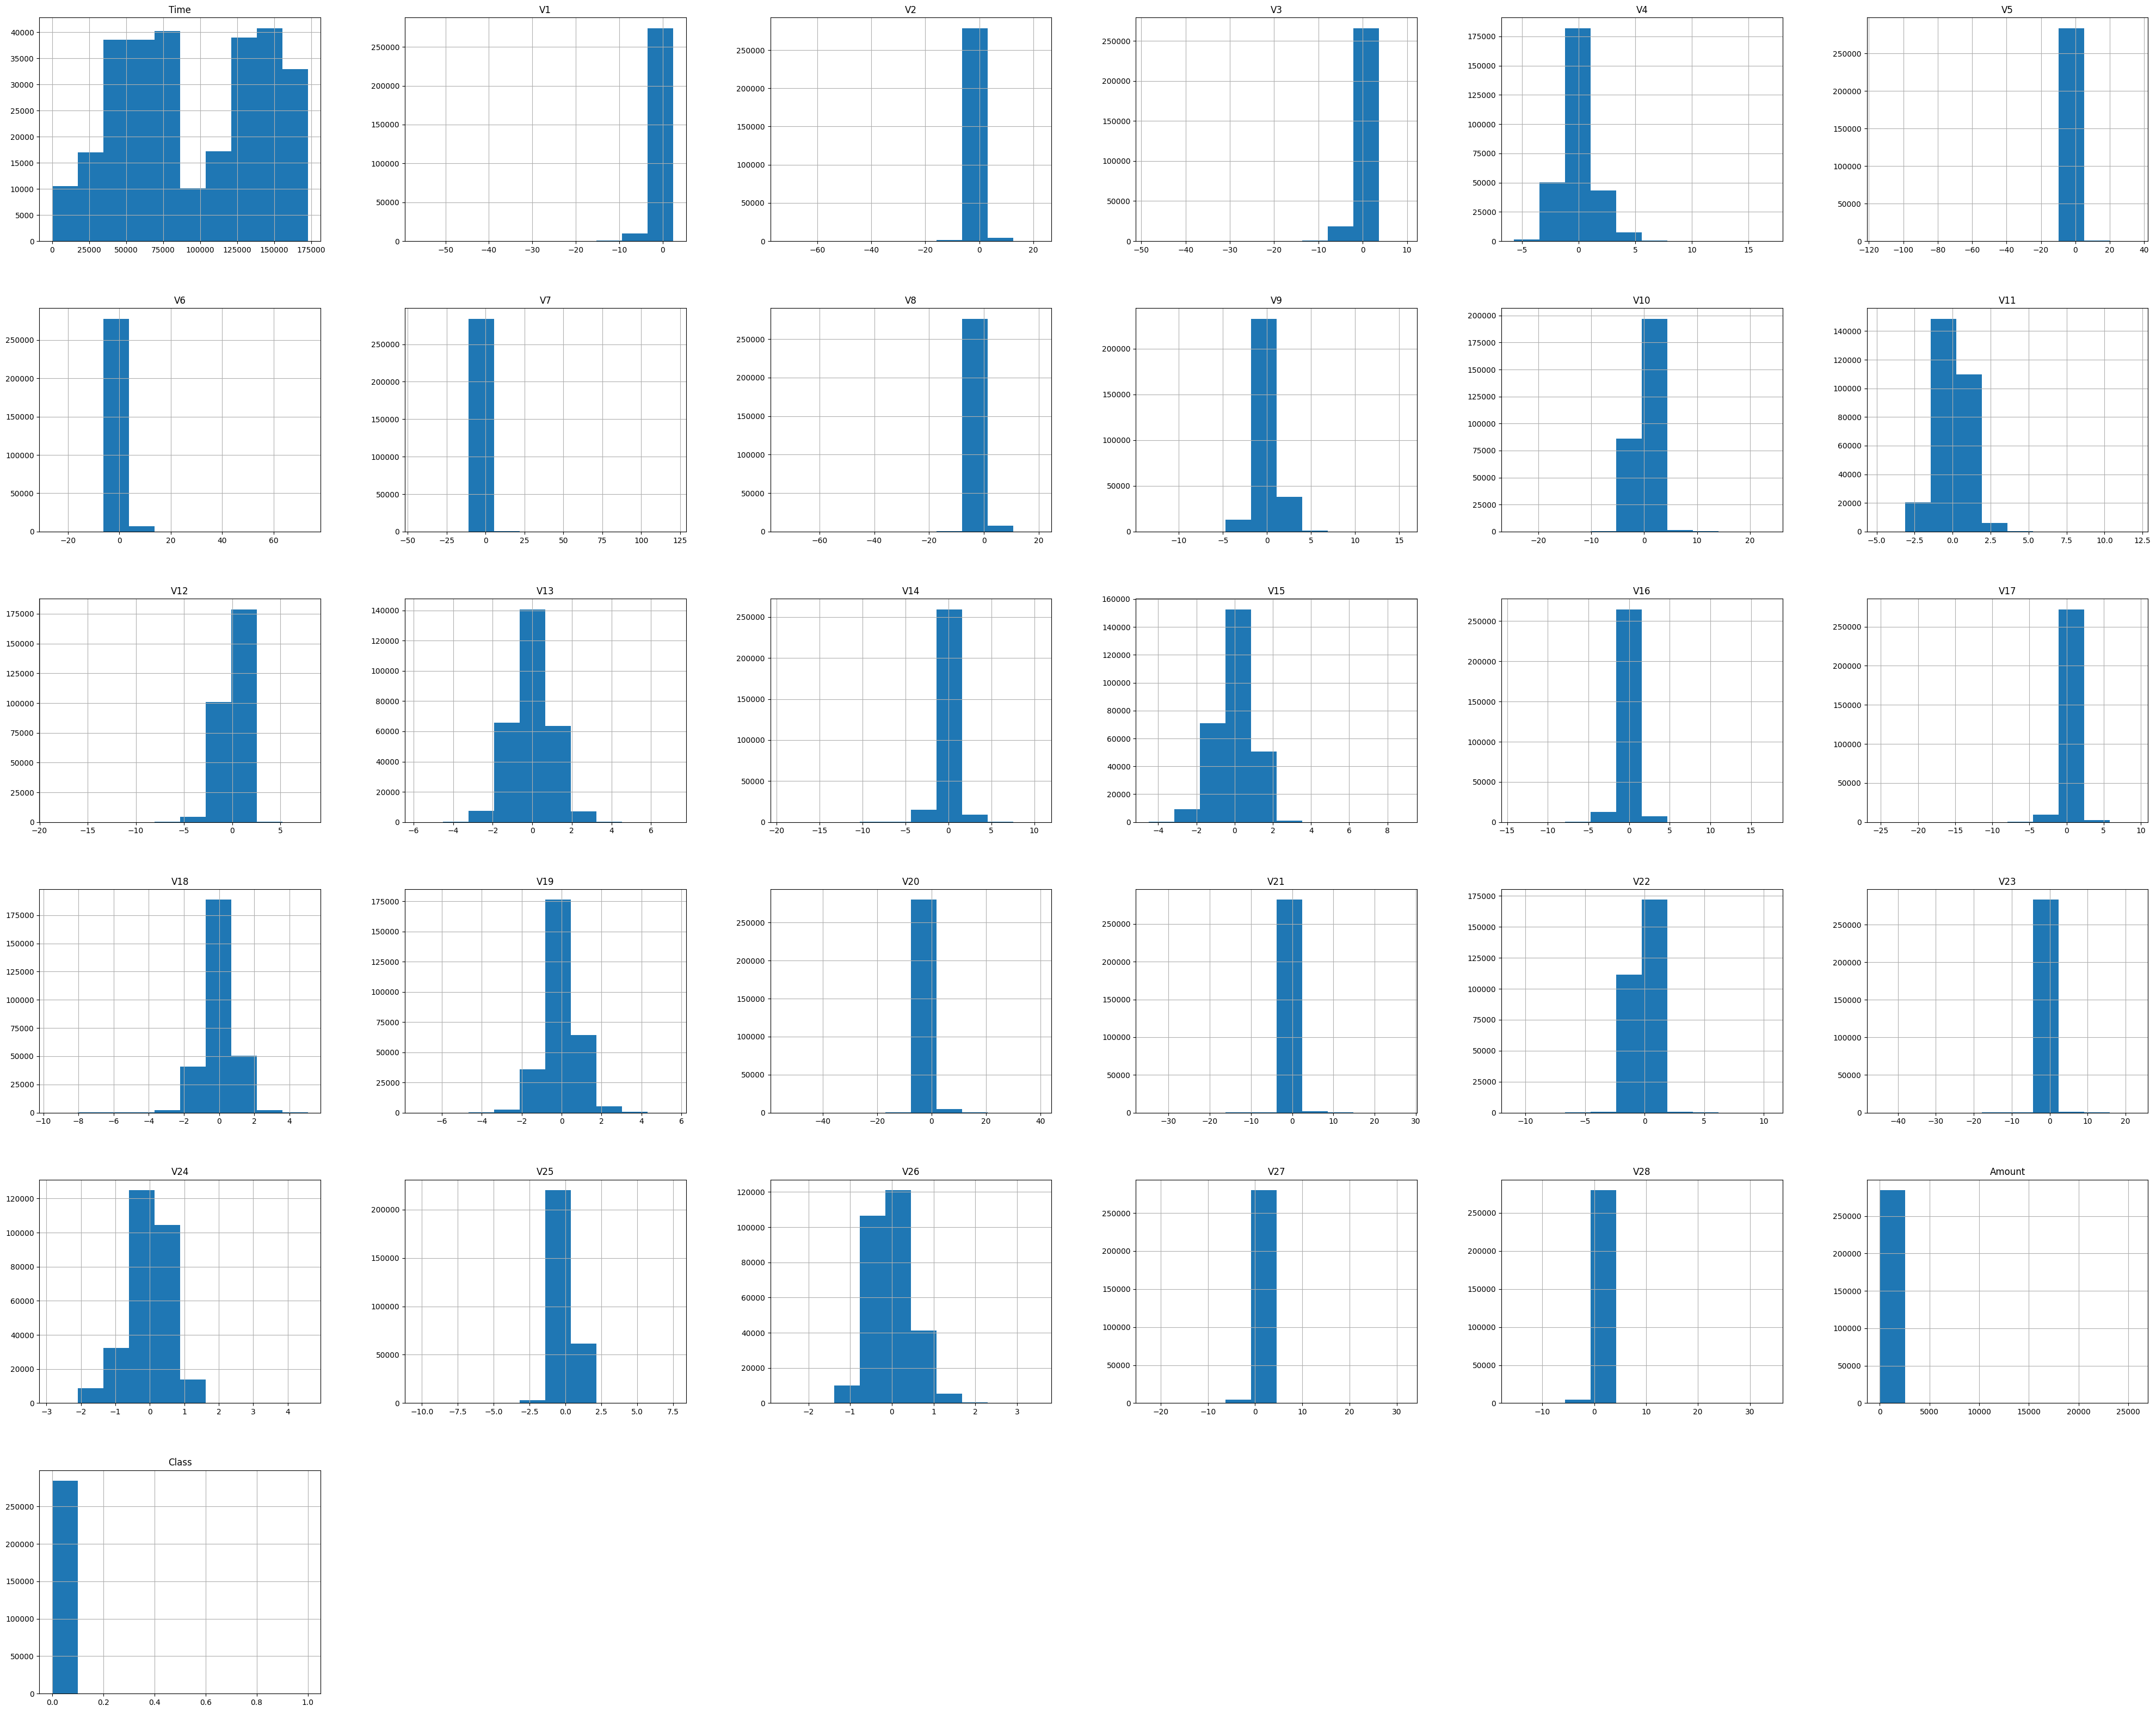

In [78]:
# Histogram of the Credit Card Dataset
fig = plt.figure(figsize = (50,40))
df.hist(ax = fig.gca());

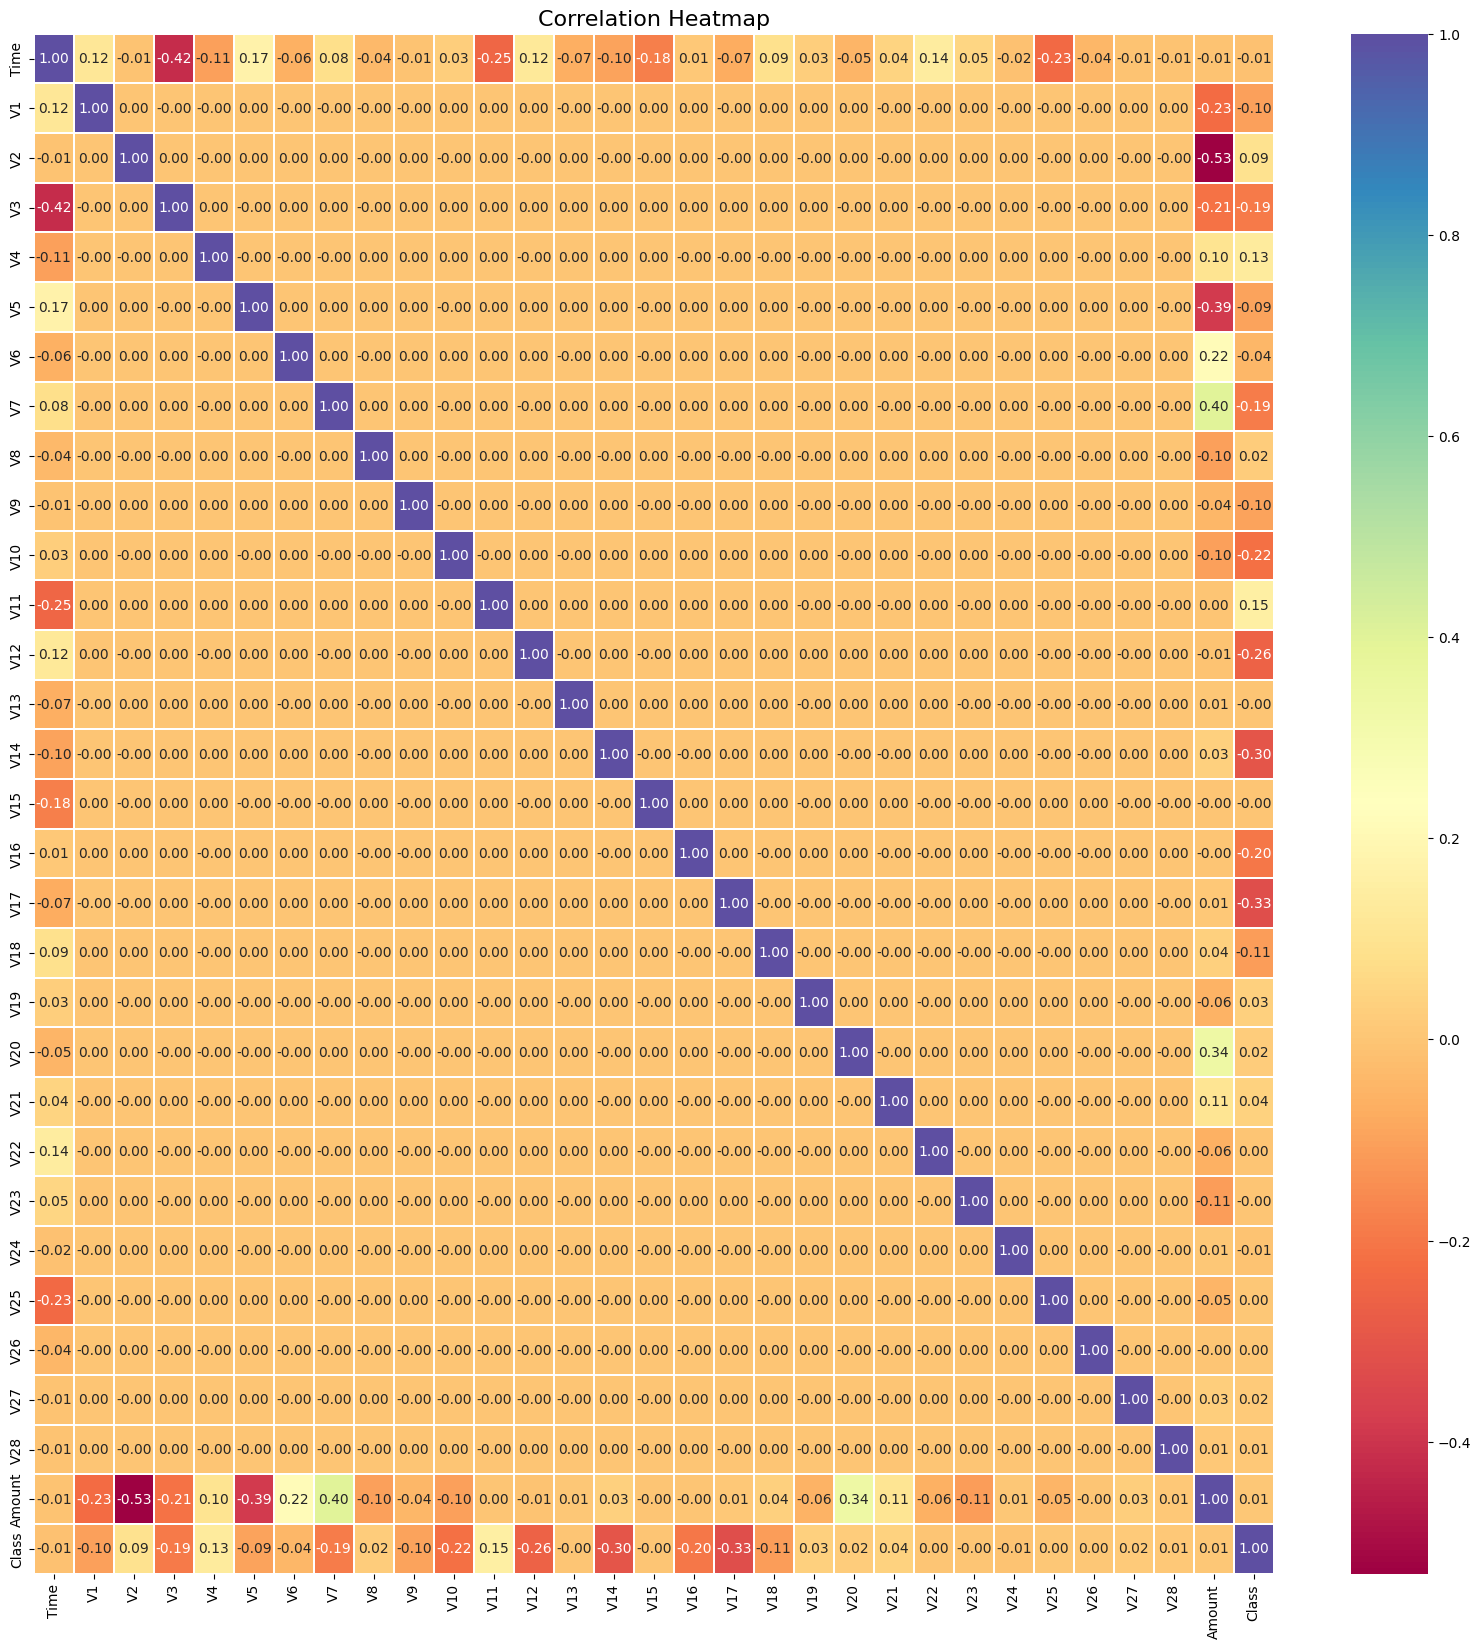

In [79]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Spectral', linewidths=0.1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

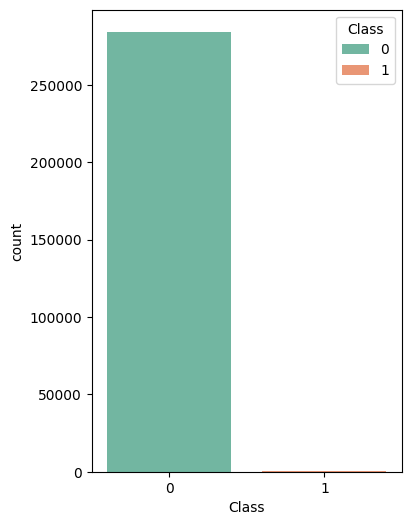

In [80]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.countplot(x='Class', data=df, hue='Class', palette='Set2', ax=ax)
plt.show()

In [81]:
# Get the Fraud and the normal dataset 
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [82]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [83]:
# Calculate class distribution percentage
df.Class.value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [84]:
# We need to analyze more amount of information from the transaction data
# How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [85]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

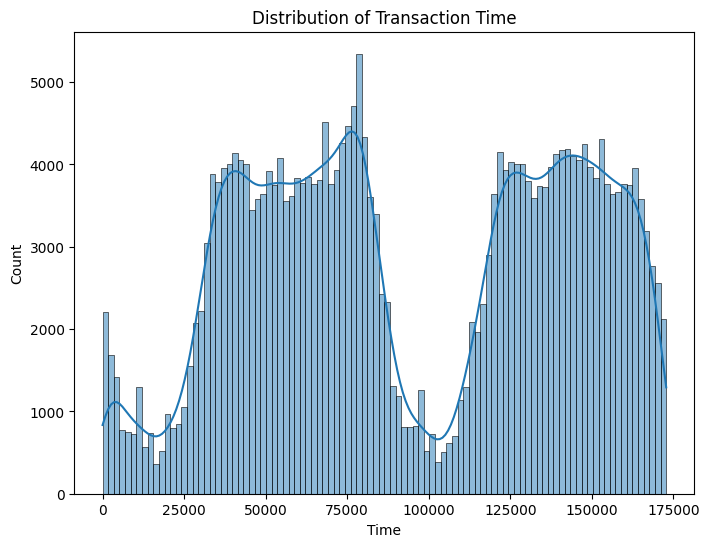

In [104]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time')
sns.histplot(df['Time'], bins=100, kde=True)
plt.show()

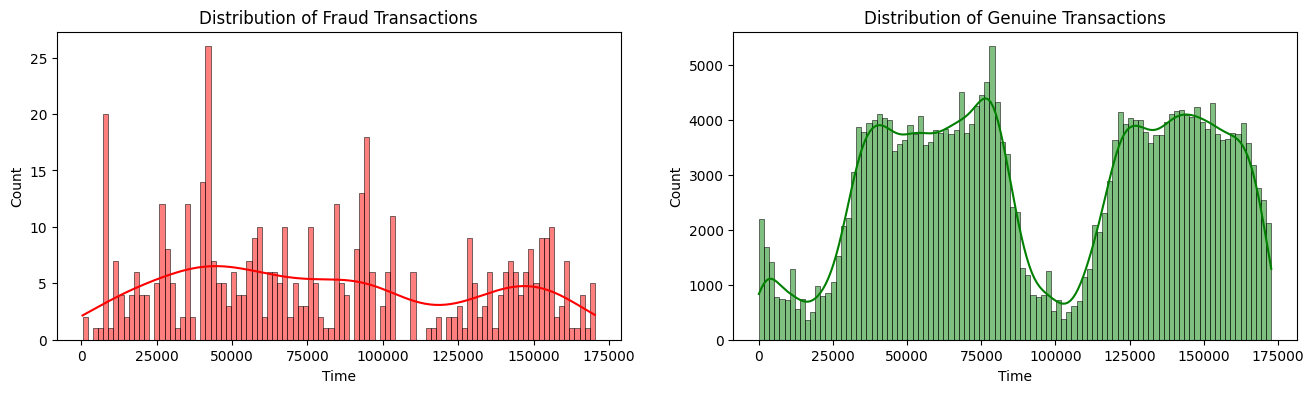

In [106]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))
sns.histplot(fraud['Time'], bins=100, color='red', kde=True, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")
sns.histplot(normal['Time'], bins=100, color='green', kde=True, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")
plt.show()

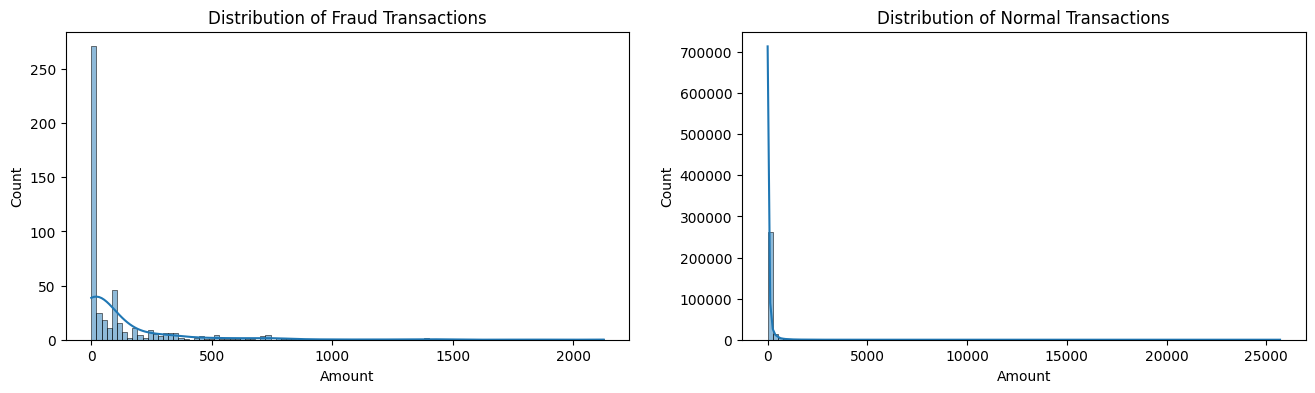

In [107]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))
sns.histplot(fraud['Amount'], bins=100, kde=True, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")
sns.histplot(normal['Amount'], bins=100, kde=True, ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")
plt.show()

Create a new dataframe df1 by randomly sampling 10% of the rows from the original dataframe df, using a random state of 1 for reproducibility.
Sampling a subset of the data can be useful when working with large datasets or when testing machine learning models on a smaller subset of the data.

In [88]:
# Taking some sample data from population data
df1= df.sample(frac = 0.1,random_state=1)
df1.shape

(28481, 31)

In [89]:
# Determine the number of fraud and valid transactions in the dataset
Fraud = df1[df1['Class']==1]
Valid = df1[df1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [90]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [91]:
X = df1.drop(columns=["Class"])  # Features
y = df1["Class"]  # Target
X_outliers = np.random.RandomState(42).uniform(0, 1, size=X.shape)

print(X.shape, y.shape)

(28481, 30) (28481,)


Isolation Forest Results:
Number of Errors: 73
Accuracy Score: 0.9974

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481



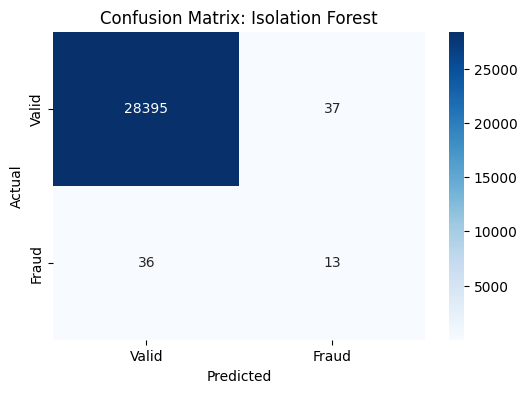

In [93]:
# Isolation Forest
clf_isolation = IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction, random_state=42)
clf_isolation.fit(X)
y_pred_isolation = clf_isolation.predict(X)

# Convert predictions to match target labels
y_pred_isolation[y_pred_isolation == 1] = 0  # Valid transactions
y_pred_isolation[y_pred_isolation == -1] = 1  # Fraudulent transactions

# Calculate metrics
n_errors_isolation = (y_pred_isolation != y).sum()
accuracy_isolation = accuracy_score(y, y_pred_isolation)

# Print metrics
print("Isolation Forest Results:")
print(f"Number of Errors: {n_errors_isolation}")
print(f"Accuracy Score: {accuracy_isolation:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred_isolation))

# Confusion Matrix
cm_isolation = confusion_matrix(y, y_pred_isolation)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_isolation, annot=True, fmt='d', cmap='Blues', xticklabels=["Valid", "Fraud"], yticklabels=["Valid", "Fraud"])
plt.title("Confusion Matrix: Isolation Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Local Outlier Factor Results:
Number of Errors: 97
Accuracy Score: 0.9966

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



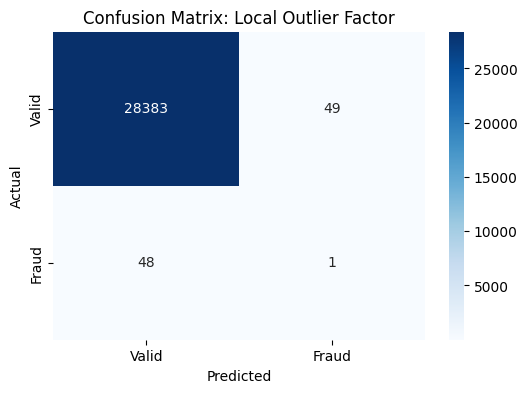

In [94]:
# Local Outlier Factor
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)
y_pred_lof = clf_lof.fit_predict(X)

# Convert predictions to match target labels
y_pred_lof[y_pred_lof == 1] = 0  # Valid transactions
y_pred_lof[y_pred_lof == -1] = 1  # Fraudulent transactions

# Calculate metrics
n_errors_lof = (y_pred_lof != y).sum()
accuracy_lof = accuracy_score(y, y_pred_lof)

# Print metrics
print("Local Outlier Factor Results:")
print(f"Number of Errors: {n_errors_lof}")
print(f"Accuracy Score: {accuracy_lof:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred_lof))

# Confusion Matrix
cm_lof = confusion_matrix(y, y_pred_lof)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lof, annot=True, fmt='d', cmap='Blues', xticklabels=["Valid", "Fraud"], yticklabels=["Valid", "Fraud"])
plt.title("Confusion Matrix: Local Outlier Factor")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Support Vector Machine Results:
Number of Errors: 8516
Accuracy Score: 0.7010

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     28432
           1       0.00      0.37      0.00        49

    accuracy                           0.70     28481
   macro avg       0.50      0.53      0.41     28481
weighted avg       1.00      0.70      0.82     28481



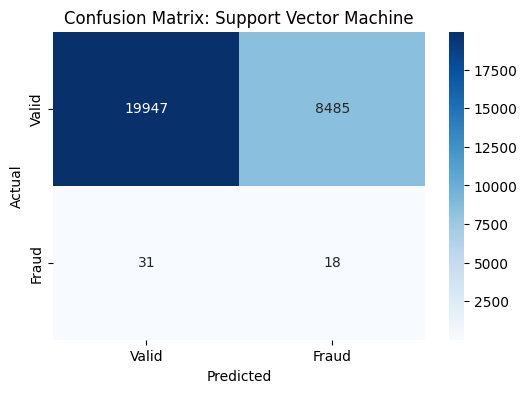

In [95]:
# Support Vector Machine
clf_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
clf_svm.fit(X)
y_pred_svm = clf_svm.predict(X)

# Convert predictions to match target labels
y_pred_svm[y_pred_svm == 1] = 0  # Valid transactions
y_pred_svm[y_pred_svm == -1] = 1  # Fraudulent transactions

# Calculate metrics
n_errors_svm = (y_pred_svm != y).sum()
accuracy_svm = accuracy_score(y, y_pred_svm)

# Print metrics
print("Support Vector Machine Results:")
print(f"Number of Errors: {n_errors_svm}")
print(f"Accuracy Score: {accuracy_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=["Valid", "Fraud"], yticklabels=["Valid", "Fraud"])
plt.title("Confusion Matrix: Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K-means Silhouette Score: 0.7155096077232389
K-means Accuracy: 0.5369
              precision    recall  f1-score   support

           0       1.00      0.54      0.70     28432
           1       0.00      0.41      0.00        49

    accuracy                           0.54     28481
   macro avg       0.50      0.47      0.35     28481
weighted avg       1.00      0.54      0.70     28481



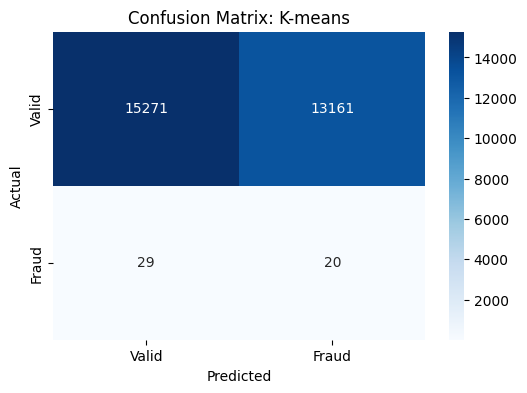

In [100]:
# Initialize and train K-means
clf_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300)
clf_kmeans.fit(X)

# Predict clusters (0 or 1)
y_pred_kmeans = clf_kmeans.labels_

# Calculate Silhouette Score
sil_score_kmeans = silhouette_score(X, y_pred_kmeans)
print("K-means Silhouette Score:", sil_score_kmeans)

# Confusion Matrix and Accuracy
cm_kmeans = confusion_matrix(y, y_pred_kmeans)
accuracy_kmeans = accuracy_score(y, y_pred_kmeans)

# Display results
print(f"K-means Accuracy: {accuracy_kmeans:.4f}")
print(classification_report(y, y_pred_kmeans))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues', xticklabels=["Valid", "Fraud"], yticklabels=["Valid", "Fraud"])
plt.title("Confusion Matrix: K-means")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

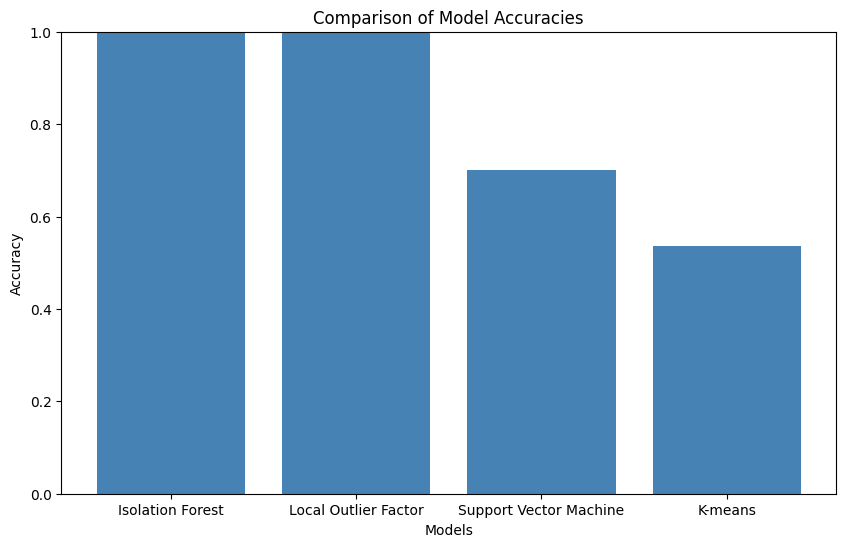

In [114]:
models = ['Isolation Forest', 'Local Outlier Factor', 'Support Vector Machine', 'K-means']
accuracy_scores = [accuracy_isolation, accuracy_lof, accuracy_svm, accuracy_kmeans]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='Steelblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()